<a href="https://colab.research.google.com/github/hinda-mt/hinda-mt/blob/main/2Supervised_Learning_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
We are going to work on the Titanic data set to predict if a passenger will survive or not using several classification algorithms of supervised learning. We will start by logistic regression, knn, then decision tree and we finalize by random forest.

---



# read data as data


In [ ]:
import pandas as pd

tc_data=pd.read_csv('titanic-passengers.csv',sep=';')
tc_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [ ]:
tc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [ ]:
print("The dimension of the table is: ", tc_data.shape)
print('we have 891 observations and 12 featuers')

The dimension of the table is:  (891, 12)
we have 891 observations and 12 featuers


#A brief description about our dataset
1.Name : name of each passeger (*ofc UNIQUE )*

3.sex: m , f

4.passenger ID (IT'S* UNIQUE *for each passenger) 

5.survived : yes he/she did/not 

6.sibSp: Sibling = brother, sister, stepbrother, stepsister

7.Spouse = husband, wife (mistresses and fiancés were ignored)

---

2.age : format is fraction xx.x (exception: Age is fractional if less than 1, If the age is estimated: xx.5)

8.parch: The dataset defines family relations by(counting numberof each member of fam)

Parent = (mother, father )  

Child = daughter, son, stepdaughter, stepson 

parch=0 :Some children travelled only with a nanny, therefore parch=0 for them)
 
9.pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

10.Embarked :Port of Embarkation
C = Cherbourg, Q = Queenstown, S = Southampton

11.cabin	: each family or of individual has stayed in one cabin *(UNIQUE)* 

12.fare	: Passenger fare that each one pays for trip


**Inspecting the dataset:
understand the data distribution in the columns that have missing values and then choose how you'll impute them. Also explain your choices, why the mean for the missing ages and not the median, was there another better approach**
#Data Preparation for Machine Learning


In [ ]:
tc_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S



**Step 0 : Making assumptions based on only OBSERVING  the dataset

**Analyzing a dataset by formulating questions and trying to answer them
**
``` 
TARGERT : SURVIVED 
1. what are the factors that made only  722 of passengers survive (32% survival rate.) 
2.logically anyone who has a small knowledge could guess that in this situation:
*females and their youngest children are always  favorized .
*obviously social hierarchy could make some differences { like how wealthy are passengers } .

**based on this and more I'm going to try to predict that using Ml algorithms 

** using univariate,bivariate analysis and multivariate analysis (maybe feature engineering) i will try to select features(factors)  **

to see what did actually affected the surviving rate ...






 ```



In [ ]:
tc_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
print(687/891)

0.7710437710437711


In [ ]:
tc_data['Cabin'].isnull().sum()

687



```
# out of 891 we have 241 not null and 687 missing values :(77%) 
#and that's totally giving us a reason to drop this column because we have only 33% of info about this colum
```



In [ ]:

tc_data=tc_data.drop(columns=['Cabin'],axis=1)
tc_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,S


In [ ]:
tc_data['Sex'].value_counts() 

male      577
female    314
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


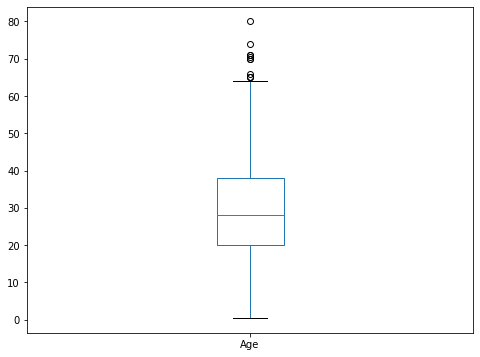

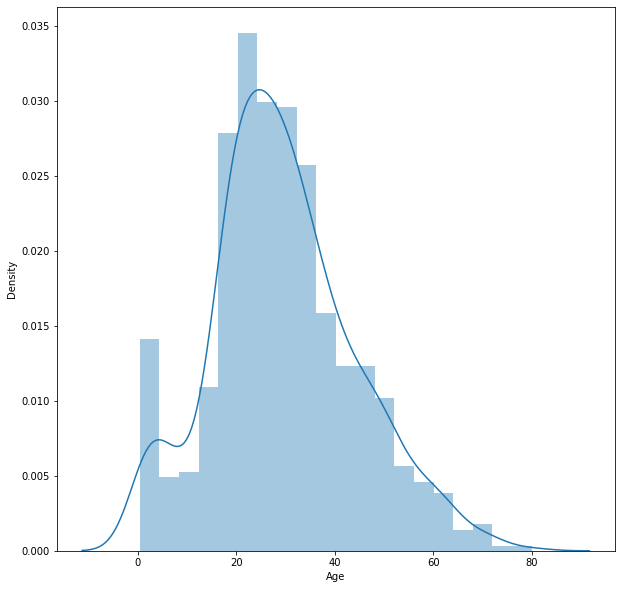

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
# Box plot
tc_data.Age.plot(kind='box', figsize=(8, 6))


# Distribution plot
plt.figure(figsize=(10,10))

sns.distplot(tc_data.Age)

***for the age i used mean()***: because  the data distribution is a bit symmetrical (almost right skewed)  according to the boxplot but we might be confused cause it looks almost symmetrical :--> IF there's another method tell me please.

**for Embarked i used mode()** :  because we have only 3 Port of Embarkation
C = Cherbourg, Q = Queenstown, S = Southampton


In [ ]:
print(tc_data.groupby('Sex')['Age'].mean())
print(tc_data.groupby('Sex')['Age'].median())

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Sex
female    27.0
male      29.0
Name: Age, dtype: float64


In [ ]:
#method 1
condition1 = tc_data['Sex'] == 'male'
condition2 = tc_data['Sex'] == 'female'
m_age =tc_data[condition1]['Age'].mean()
f_age =tc_data[condition2]['Age'].mean()

import numpy as np

for ind, row in tc_data.iterrows():
    if (np.isnan(row['Age'])) & (row['Sex'] == 'male'):
        tc_data.loc[ind, 'Age'] = m_age
    elif (np.isnan(row['Age'])) & (row['Sex'] == 'female'):
        tc_data.loc[ind, 'Age'] = f_age
        
tc_data.Age.isnull().sum()

0

In [ ]:
print('THE MAJORITY OF PASSENGER (72%) came from Southampton port (UK) 20% FROM Queenstown PORT (AMERICANS) 8% FROM  Cherbourg (France)')
tc_data['Embarked'].value_counts('Normalize') # S plus favorisé mais i faut inspecter 5atr mode bin 644 o (168 et 77) IS AMBIGOUS so we keep checking  this way

THE MAJORITY OF PASSENGER (72%) came from Southampton port (UK) 20% FROM Queenstown PORT (AMERICANS) 8% FROM  Cherbourg (France)


S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [ ]:
tc_data.Embarked.isnull().sum()

2

In [ ]:
tc_data['Embarked'].mode()[0]

'S'



```
#We still have 2 missing values on the embarked column, we're gonna replace with the mode

```



In [ ]:
tc_data['Embarked'].fillna(tc_data['Embarked'].mode()[0],inplace=True)
# correct (age ,embarked,sex)


In [ ]:
tc_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#step 1 : feature selection while cleaning and transforming   our data
The Name ,PassengerId, Cabin and Ticket: are almost unique for each passenger, encoding them won't help in any type of analysis, for the rest like Survived, Sex and Embarked, it would be better to encode them.



In [ ]:
tc_data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [ ]:
tc_data["Survived"] = tc_data["Survived"].map({"Yes": 1, "No": 0}) 
#same for embarked too we can do same thing here or: use get_dummies

In [ ]:
Sex_enc = pd.get_dummies(tc_data['Sex'], prefix='Sex', drop_first=True)
Sex_enc

,Sex_male
0,1
1,1
2,1
3,0
4,1
...,...
886,0
887,1
888,0
889,1


In [ ]:
# or : tc_data["Sex"] = tc_data["Survived"].map({'male': 1 ,'female': 0}) 

In [ ]:
embarked_enc = pd.get_dummies(tc_data['Embarked'], prefix='Embarked', drop_first=True)# two 0 in embarked_s goes to embarked_C (EXPlANATION FOR ME) 

In [ ]:
newdf= pd.concat([tc_data,Sex_enc,embarked_enc], axis=1) 
newdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,1,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,1,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,1,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,0,0,1
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,1,0,1


View summary of the new dataset after data preprocessing phase


In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Sex_male     891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB




```
**A smarter method for preprocessing is creating a function that we call it again  whenever we have a new dataset **

#Importing our dataset from csv file
#import pandas as pd 
#dataset=pd.read_csv("titanic-passengers.csv", sep=";")
#Preprocessing our data
#def preprocess_data(new_data):
    #new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    #new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    #new_data['Cabin']=new_data.Cabin.fillna('G6')
    #new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    #return new_data
#data=preprocess_data(dataset)```



#Exploratory Analysis


In [ ]:
newdf.describe(include='all')
#SURVIVED ,SEX TOO (cat features ) IS BETWEEN 0 AND 1 PAY ATTENTION MEAN STD AND ALLL THAT MEANS NOTHING (CS THEY ARE ENCODED THAT MEANS +EMBARKED  ) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891.000000,891.000000,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3,NaN,NaN,NaN
top,NaN,NaN,NaN,"Salonen, Mr. Johan Werner",male,NaN,NaN,NaN,CA. 2343,NaN,S,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646,NaN,NaN,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.736034,0.523008,0.381594,NaN,32.204208,NaN,0.647587,0.086420,0.725028
std,257.353842,0.486592,0.836071,NaN,NaN,13.014897,1.102743,0.806057,NaN,49.693429,NaN,0.477990,0.281141,0.446751
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,30.000000,0.000000,0.000000,NaN,14.454200,NaN,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,1.000000,0.000000,1.000000




```
step 2:
afTer data preprocessing phase time for formulating questions based on univarate anaysis + bivariate analysis 

1.  THE AVERAGE NUMBER FOR SURVIVED PASSENGERS WAS 38% 
AFTER GROUPING SURVIVED PASSENGERS  BY Embarkation  the luckiest were from which  country ?

but seeing that the majority of passengers (72%) came from Southampton port (UK) does that affect the survived rate ? 
OR DID THE MAJORITY OF SURVIVED PASSENGERS WERE britsh ?

2. THE AVERAGE NUMBER FOR SURVIVED PASSENGERS WAS 38% :
AFTER GROUPING AGE BY SEX what is the minimum age for survivors ?
AFTER GROUPING survived BY SEX  does it TELLs THAT THERE'S Gender bias FOR SURVIVERS  ??


3.  THE AVERAGE NUMBER FOR SURVIVED PASSENGERS WAS 38% : 
HOW MUCH OF SURVIVED PASSENGERS  WERE IN THE  1ST Class AND 2 Class ?
AFTER CLASSIFYING SURVIVED PASSENGERS  BY PClass (or fare ) .

4. IS THERE ANY RElATIONSHIP BETWEEN (PClass AND fare)  (age sex) ??
5. (SibSp	Parch  SEX ) ( Pclass and sibs parch) ⚛ USING FEATURE ENGINEERING social hierarchy , marital status AND RELATIONS SHOULD BE CONSIDERED AS A FACTOR TOO, so how was that ?

6. the average age for passengers was 30 : more adults 
   the minimum age was : 0.420000 babies are included too so houw much of babies has been survived ?
 





```



first_num_continuous 

In [ ]:
newdf_num_continuous = newdf[['Age','SibSp','Parch','Fare']]

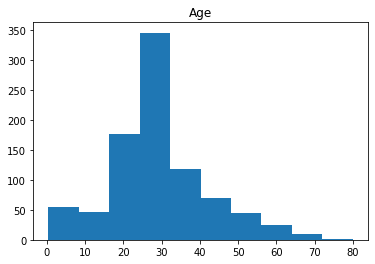

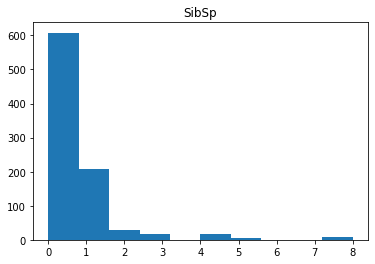

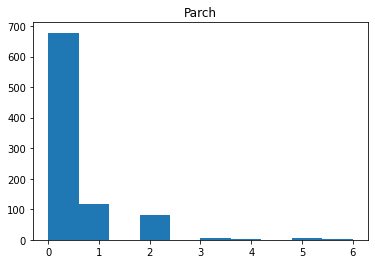

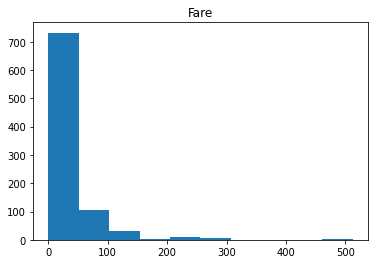

In [ ]:
for i in newdf_num_continuous:
    plt.hist(newdf_num_continuous[i])
    plt.title(i)
    plt.show()

Hichem what can i say about 'fare' and 'SibSp' AND 'PARCH' in this graph?

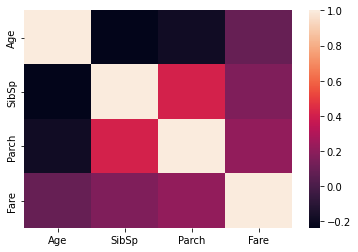

In [ ]:
import seaborn as sns
sns.heatmap(newdf_num_continuous.corr())

1.there a  positive relationship between sibSP AND Parch of 0.5 which is oviously true because most of the families has children who were sibilings.

2.(fare parch) yes it exist a positive relationship of 0.2 which means yes most of the passengers were related  to each other('families').explaned also by correlation of 0.2 of sibSp and fare




In [ ]:
pd.pivot_table(newdf, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.562012,22.117887,0.329690,0.553734
1,28.410122,48.395408,0.464912,0.473684




```
# HICHEM DID I READ IT RIGHT ?
```


'yes' they survived : the average age of survived was 28 also  about 47% of  them were families and they could be  1st class according to the fare of 48%

'no' unfortunatly : the average age of UNLUCKY PASSENGERS was 30 also  about 32% of  them were families WITH 55% SIBS and they could be  3st class according to the fare of 48%

WE WILL CHECK THAT IN THE SECOND PART OF ANALYZING CATEGORICAL FEATURES ?

In [ ]:
newdf_cat = newdf[['Pclass','Sex','Embarked']]
#pclass is ordinal(ordred)

In [ ]:
newdf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


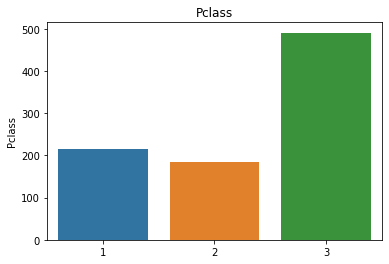

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


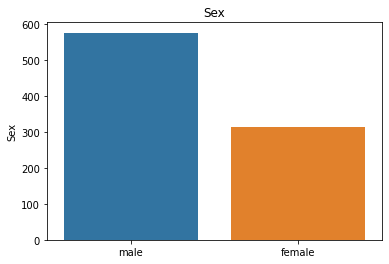

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


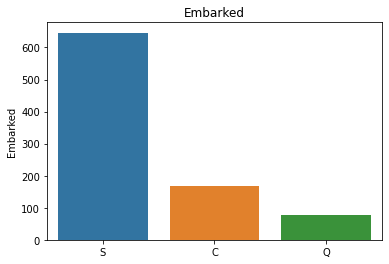

In [ ]:
for i in newdf_cat.columns:
    sns.barplot(newdf_cat[i].value_counts().index,newdf_cat[i].value_counts()).set_title(i)
    plt.show()

1.FIRST GRAPH:the majority of passengers were 3rd class 

1st class were more than 2nd class

2.SECOND GRAPH: the majority of passengers were males 


3.THIRD GRAPH: the majority were britsh and compared to majority of the britsh ones we have about quarter number are french  


In [ ]:
print(pd.pivot_table(newdf, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(newdf, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(newdf, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219




```
# HICHEM DID I READ IT RIGHT ?
```
'yes' they survived : 136 of survivors were 1st class , 233 were females  the majority of them were britsh , 30 were frensh and  75 were amaricans 

** AM I MISTAKEN after calculating the rate simpson paradox ?
---

'no' unfortunatly : 372 of  UNLUCKY PASSENGERS were 3rd class , 468 of them males the majority were britsh too : 427 , 47 were frensh and  93 were amaricans

conclusion 🪶 the most affecting factors that really affected the survivors rate were sex and  social hiarcky .


**another way is creating a function to show the distribution of num features and categorical features for cat features**

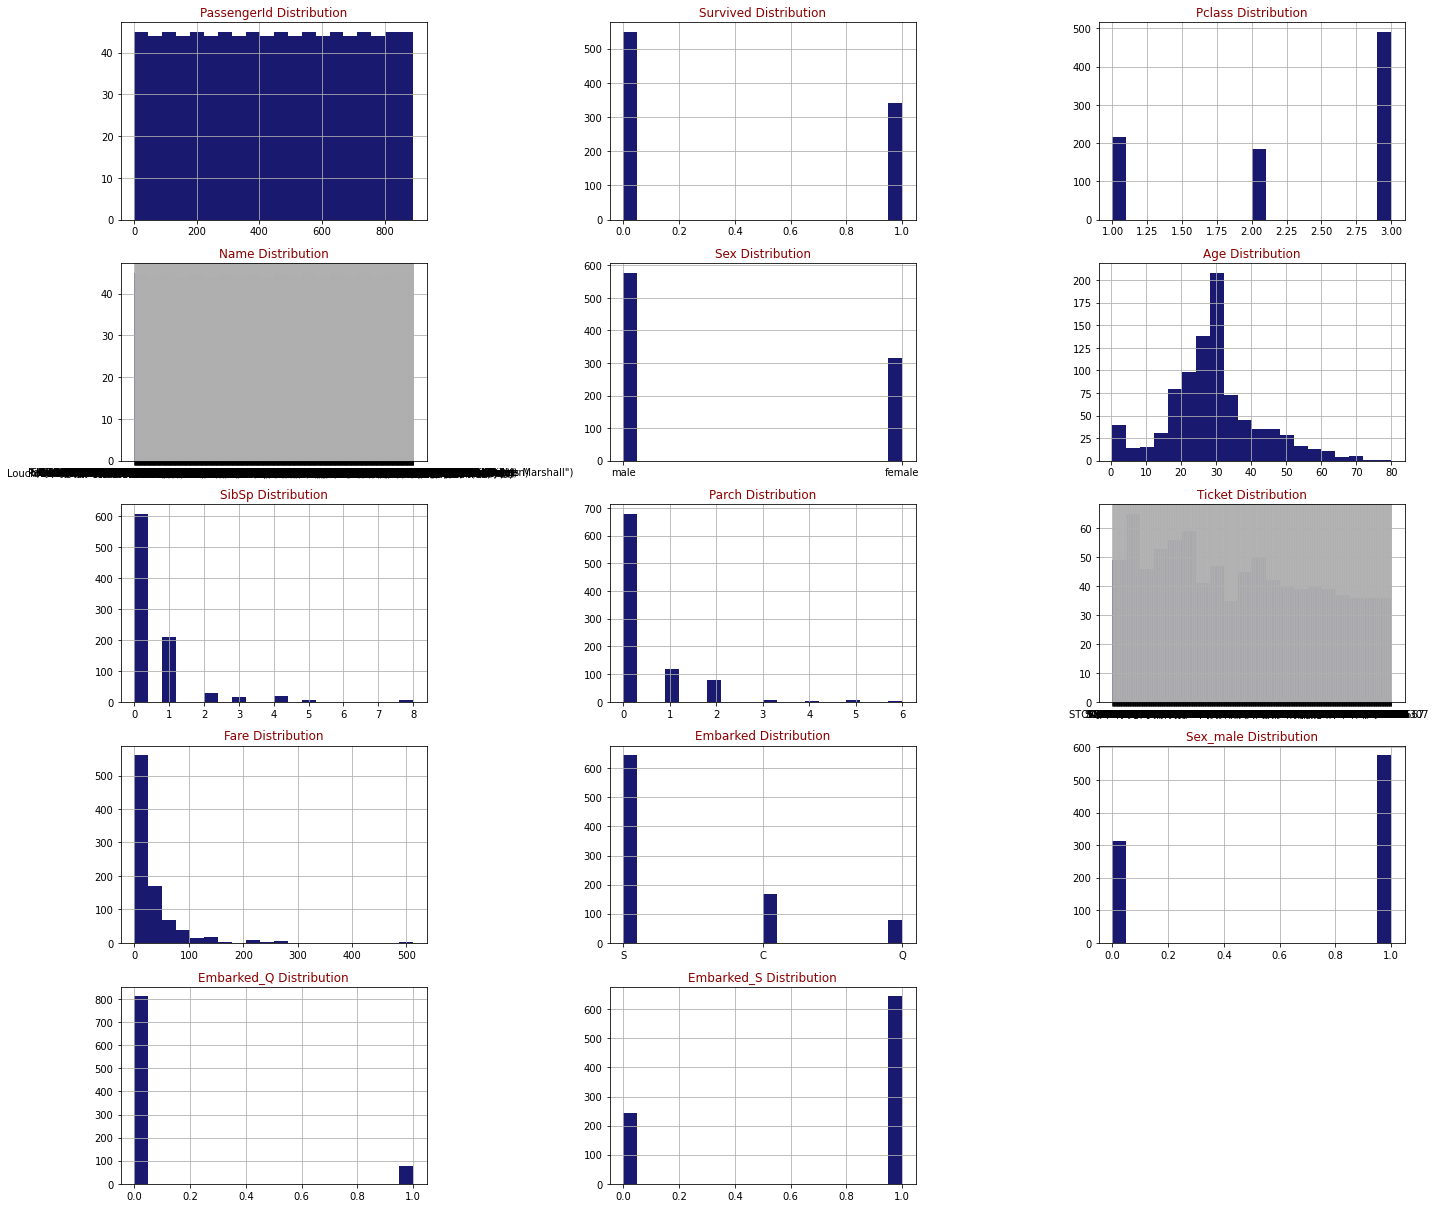

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(newdf,newdf.columns,6,3)

#step 3 : checking our assumptions based on macine learning algorithms 

Instructions 
Part 1 Logistic Regression

1. Apply logistic regression. 

2. Use confusion matrix to validate your model. 

3. Another validation matrix for classification is ROC / AUC , do your research on them explain them and apply them in our case from :
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html



**preparing data for logistic regression and converting Survived variable into numerical**


In [ ]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#features extraction
x = newdf[['Age','Sex_male','Pclass' ,'Embarked_Q','Embarked_S']]
y = newdf['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  
#splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
print('How many Correct predictions we made out of all observations ', "Accuracy={:.2f}".format(logreg.score(x_test, y_test)) )



Accuracy=0.82
How many Correct predictions we made out of all observations  Accuracy=0.82


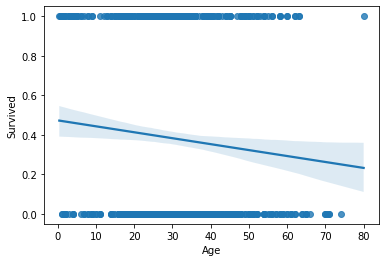

In [ ]:
import seaborn as sns
sns.regplot(x='Age',y='Survived',data=newdf)

what can i say ?

2. Use confusion matrix to validate your model. 


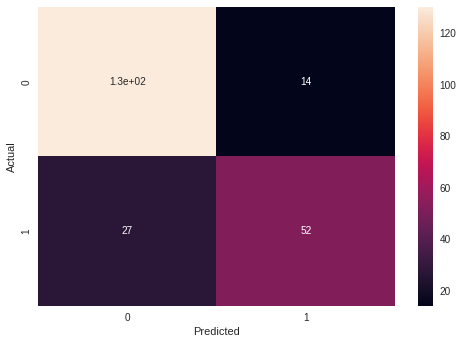

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


(52 for TRUE NEGATIVE ,27 FOR FALSE NEGATIVE,14 FOR FALSE POSITIVE and 1.3e+02 for true positive )

 here which one do we choose precision or accuracy ?



In [ ]:
#how i interpret this ?
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       144
           1       0.79      0.66      0.72        79

    accuracy                           0.82       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.82      0.81       223



Receiver Characteristic Operator  / Area Under the Curve  
ROC ⚛ is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’.

AUC ⚛ is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

we need to evaluate  and validate how good (or bad) it our linear regression using this method, so i can then decide on whether to implement it. That’s where the AUC-ROC curve comes in.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# logistic regression
model1 = LogisticRegression()

# fit model
model1.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score1


0.8337289029535865

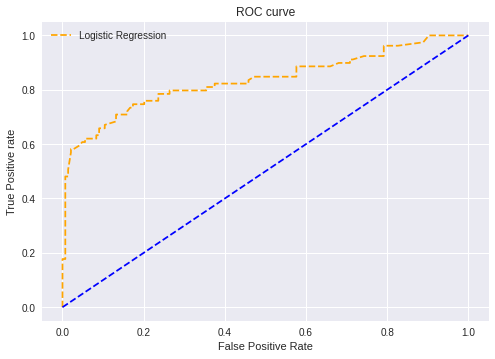

In [ ]:
#We can also plot the ROC curves 
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)


Part 2 KNN

1.  Apply the KNN and predict your model

2. Choose the optimal number of neighbors

In [ ]:
#Choosing the features as x and the target as y

In [ ]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 20%  : no training  every time

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuracy=',accuracy_score(y_pred,y_test))

Acuracy= 0.6927374301675978


In [ ]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.65
Accuracy for k= 2 is: 0.65
Accuracy for k= 3 is: 0.66
Accuracy for k= 4 is: 0.65
Accuracy for k= 5 is: 0.69
Accuracy for k= 6 is: 0.66
Accuracy for k= 7 is: 0.69
Accuracy for k= 8 is: 0.69
Accuracy for k= 9 is: 0.72
Accuracy for k= 10 is: 0.69
Accuracy for k= 11 is: 0.7
Accuracy for k= 12 is: 0.7
Accuracy for k= 13 is: 0.72
Accuracy for k= 14 is: 0.7
Accuracy for k= 15 is: 0.72
Accuracy for k= 16 is: 0.72
Accuracy for k= 17 is: 0.72
Accuracy for k= 18 is: 0.73
Accuracy for k= 19 is: 0.77
Accuracy for k= 20 is: 0.75
Accuracy for k= 21 is: 0.74
Accuracy for k= 22 is: 0.73
Accuracy for k= 23 is: 0.75
Accuracy for k= 24 is: 0.75
Accuracy for k= 25 is: 0.76
Accuracy for k= 26 is: 0.71
Accuracy for k= 27 is: 0.76
Accuracy for k= 28 is: 0.7
Accuracy for k= 29 is: 0.73


Text(0, 0.5, 'Testing Accuracy')

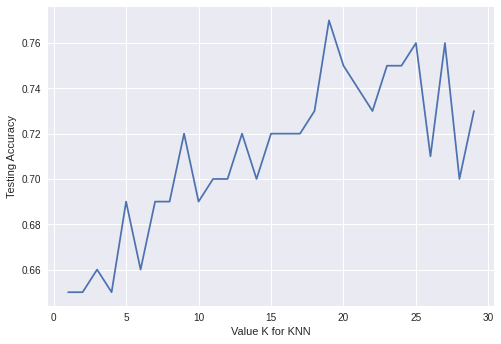

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')


Part 3:  Decision tree and random forest

1. Apply decision tree and predict you model

2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

3. Change the decision tree parameters(change at least two parameters), 

4. Calculate the new accuracy and compare it with the previous results. 

5. Use random forest then change the number of estimators

6. Calculate the new accuracy and compare it with the previous result.


In [ ]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
#applying tree algorithm
dtree= tree.DecisionTreeClassifier()  
dtree.fit(x_train, y_train)   #fitting our model
y_pred=dtree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8044692737430168


KeyError: ignored

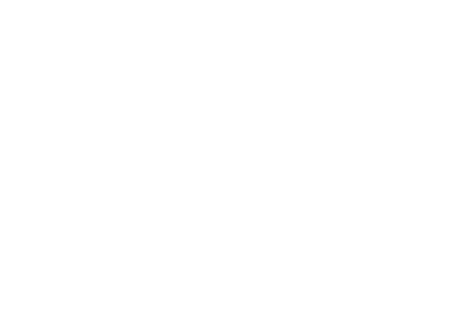

In [ ]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
import graphviz
dec_tree = plot_tree(decision_tree=dtree, feature_names = x, class_names =['yes Survived', "No did not Survived"] , filled = True , precision = 4, rounded = True)

In [ ]:
pip install graphviz

In [ ]:
pip install dtreeviz

In [ ]:

#conclusion: by calculating this prediction manually.

print( 2/3  ,'\n by calculating this prediction manually')





0.6666666666666666 
 by calculating this prediction manually


In [ ]:
#splitting data and changing the two parameter(30% for testing ,number splits the test and training datasets with a random of 40)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=40) #change parameter
#applying tree algorithm
clf2 = tree.DecisionTreeClassifier()  
clf2.fit(x_train, y_train)   #fitting our model
y_pred=clf2.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))
print('the score of the first classifier :0.80 has increased by 3%  in the second classifier :')


score:0.8395522388059702
the score of the first classifier :0.80 has increased by 3%  in the second classifier :




```
#NOTICING that by changing the two parameter and increasing the percentage of testing 
and by randomly trying different values for random_state  we get to add 3% OF accuracy_score WHICH SERVICE A BIT IN OUR PREDICTION
THIS IS USEFUL FOR boosing the performence of our model

viz we can see that in this plot too 
```

random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn.model_selection import GridSearchCV

from sklearn import metrics  # Importing metrics to test accuracy

clf_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
# checking the oob score
#clf_rf.oob_score_ 

params = {
          'max_depth': [2,3,5,10,20],
          'min_samples_leaf': [5,10,20,50,100,200],
          'n_estimators': [10,25,30,50,100,200]
         }

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
#time
grid_search.fit(x_train, y_train)

rf_best = grid_search.best_estimator_
rf_best
print("score:{}".format(accuracy_score(y_test, y_pred)))


Fitting 4 folds for each of 180 candidates, totalling 720 fits
score:0.8395522388059702


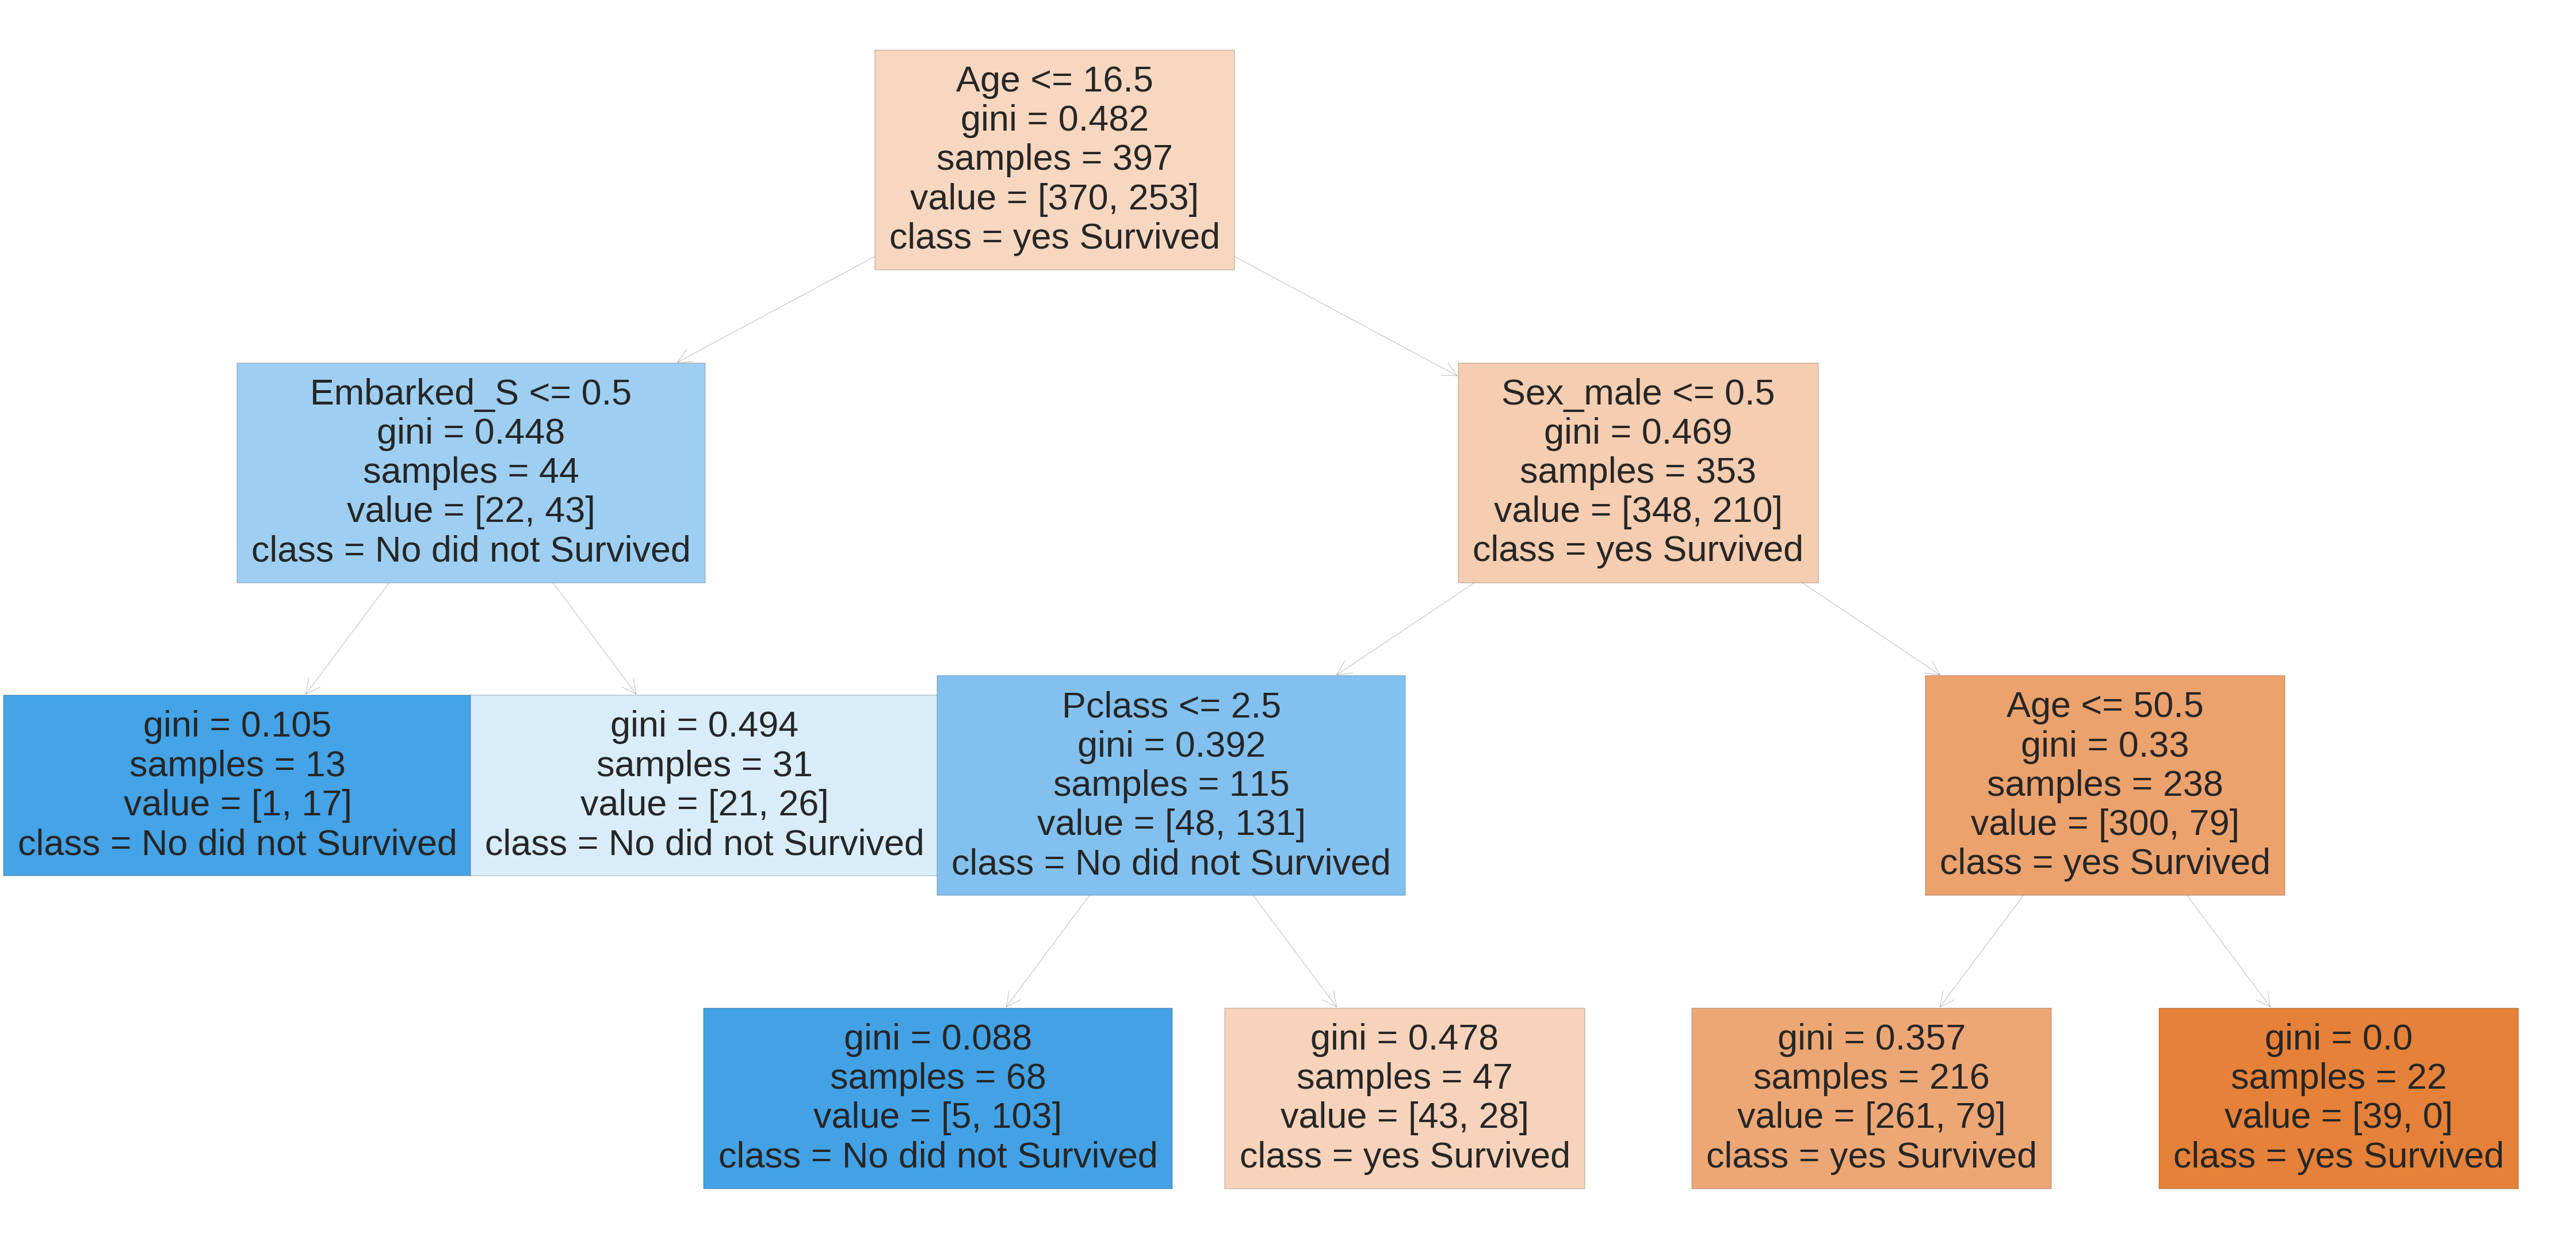

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = x.columns,class_names=['yes Survived', "No did not Survived"],filled=True);

In [ ]:
#i changed hyperparameter
clf_rf = RandomForestClassifier(random_state=50, n_jobs=-1, max_depth=7,
                                       n_estimators=200, oob_score=True)
params = {
          'max_depth': [2,3,5,10,20],
          'min_samples_leaf': [5,10,20,50,100,200],
          'n_estimators': [10,25,30,50,100,200]
         }

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
#time
grid_search.fit(x_train, y_train)

rf_best2 = grid_search.best_estimator_
rf_best2
print("score:{}".format(accuracy_score(y_test, y_pred)))

Fitting 4 folds for each of 180 candidates, totalling 720 fits
score:0.8395522388059702


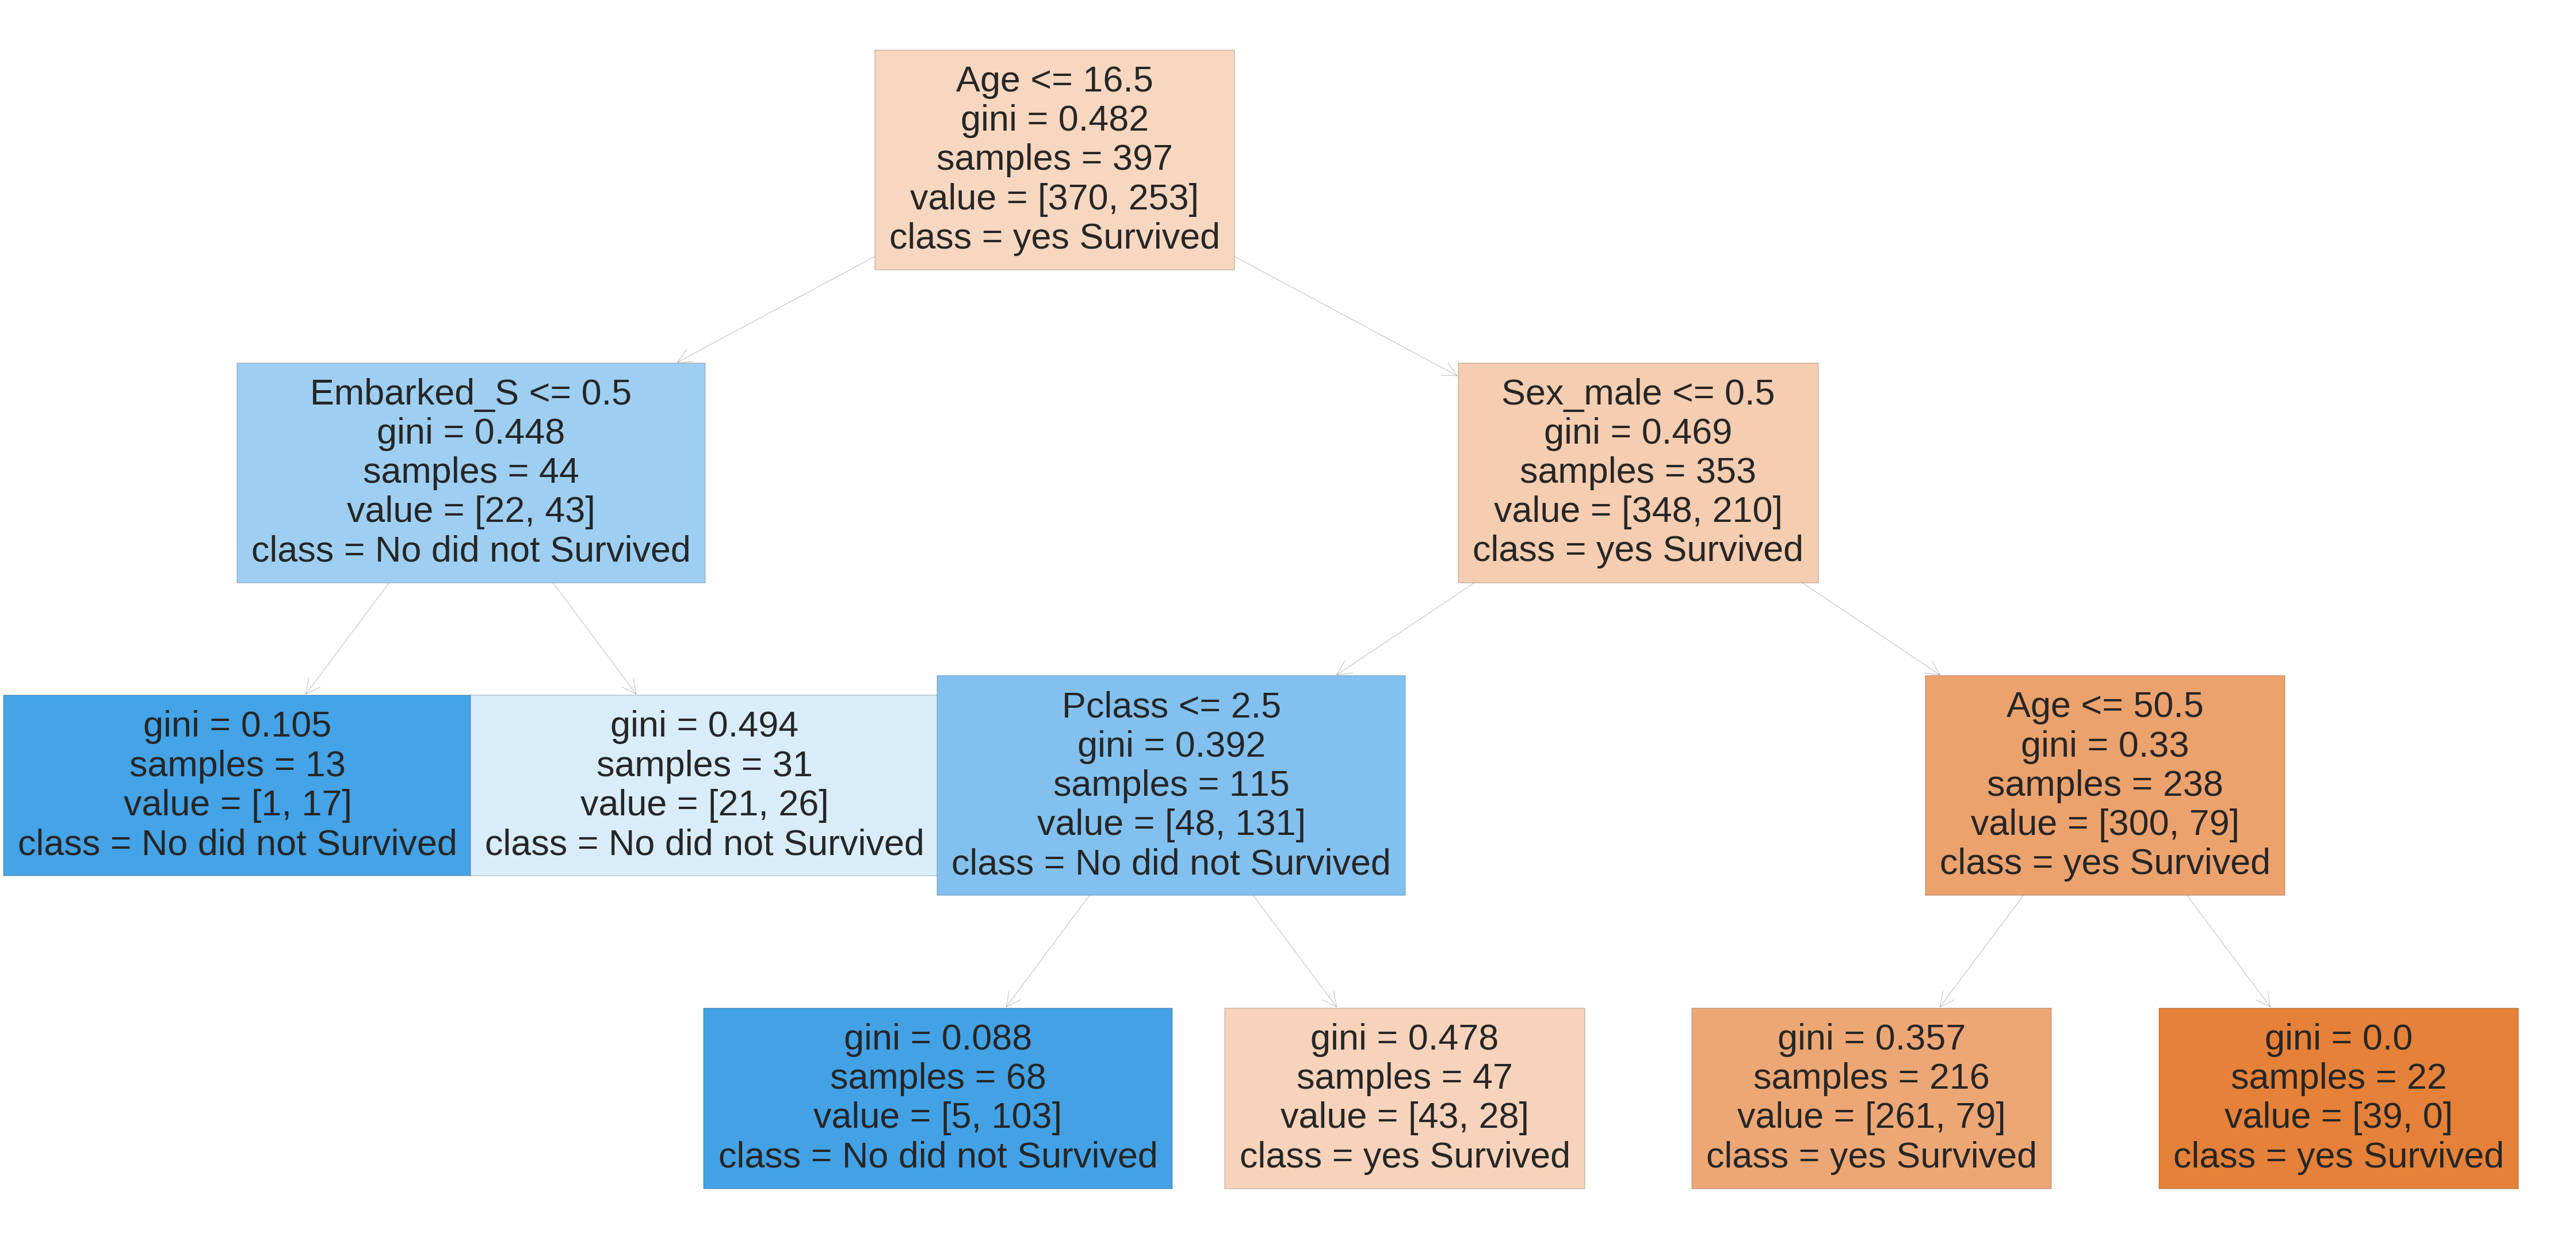

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = x.columns,class_names=['yes Survived', "No did not Survived"],filled=True);

Now to finalize your project, make a summary graph which resume all accuracies of each model(logistic regression, knn Decision tree and random forest) to decide which model is the most performant


LR: 0.790162 (0.050065)
KNN: 0.785680 (0.040036)
CART: 0.791298 (0.031423)
RF: 0.804657 (0.044900)


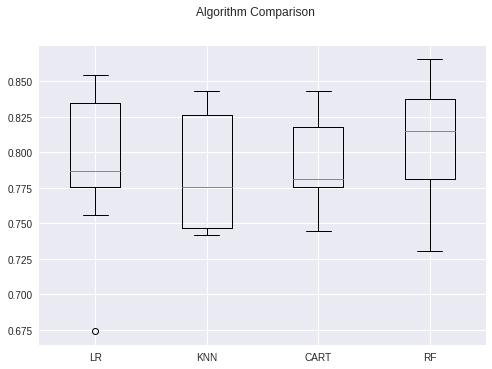

In [ ]:
from sklearn import model_selection

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=None,shuffle=True)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Summary
ther's a slight variance between results here for the truples(LR,CART,RF) ⚖

knn is not the best model in our case ☹




```








```

